<a href="https://colab.research.google.com/github/vedant230902/Customer_Segmentation_ML_KMeans/blob/main/NBA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA All Time Regular Season and Playoffs EDA

![LeBron's Chalk Toss](https://cdn.bleacherreport.net/temp_images/2013/12/09/LeBronDance.gif)




##Getting Data through web crapping from official nba website

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# using url to import data
test_url = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory=PTS'

In [3]:
r = requests.get(url= test_url).json()

In [4]:
# checking headers and content
r['resultSet']['headers']

['PLAYER_ID',
 'PLAYER_NAME',
 'GP',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'AST_TOV',
 'STL_TOV',
 'EFG_PCT',
 'TS_PCT',
 'GP_RANK',
 'MIN_RANK',
 'FGM_RANK',
 'FGA_RANK',
 'FG_PCT_RANK',
 'FG3M_RANK',
 'FG3A_RANK',
 'FG3_PCT_RANK',
 'FTM_RANK',
 'FTA_RANK',
 'FT_PCT_RANK',
 'OREB_RANK',
 'DREB_RANK',
 'REB_RANK',
 'AST_RANK',
 'STL_RANK',
 'BLK_RANK',
 'TOV_RANK',
 'PF_RANK',
 'PTS_RANK',
 'AST_TOV_RANK',
 'STL_TOV_RANK',
 'EFG_PCT1',
 'TS_PCT1']

In [5]:
table_headers = r['resultSet']['headers']

In [6]:
df = pd.DataFrame(r['resultSet']['rowSet'], columns = table_headers)

## Data Inspection

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_ID     4898 non-null   int64  
 1   PLAYER_NAME   4897 non-null   object 
 2   GP            4898 non-null   int64  
 3   MIN           4644 non-null   float64
 4   FGM           4898 non-null   int64  
 5   FGA           4898 non-null   int64  
 6   FG_PCT        4898 non-null   float64
 7   FG3M          3613 non-null   float64
 8   FG3A          3613 non-null   float64
 9   FG3_PCT       3613 non-null   float64
 10  FTM           4898 non-null   int64  
 11  FTA           4898 non-null   int64  
 12  FT_PCT        4898 non-null   float64
 13  OREB          3917 non-null   float64
 14  DREB          3917 non-null   float64
 15  REB           4677 non-null   float64
 16  AST           4898 non-null   int64  
 17  STL           3917 non-null   float64
 18  BLK           3917 non-null 

In [8]:
df.isnull().sum()

PLAYER_ID          0
PLAYER_NAME        1
GP                 0
MIN              254
FGM                0
FGA                0
FG_PCT             0
FG3M            1285
FG3A            1285
FG3_PCT         1285
FTM                0
FTA                0
FT_PCT             0
OREB             981
DREB             981
REB              221
AST                0
STL              981
BLK              981
TOV             1183
PF                 0
PTS                0
AST_TOV         1183
STL_TOV         1183
EFG_PCT            0
TS_PCT             0
GP_RANK            0
MIN_RANK           0
FGM_RANK           0
FGA_RANK           0
FG_PCT_RANK        0
FG3M_RANK          0
FG3A_RANK          0
FG3_PCT_RANK       0
FTM_RANK           0
FTA_RANK           0
FT_PCT_RANK        0
OREB_RANK          0
DREB_RANK          0
REB_RANK           0
AST_RANK           0
STL_RANK           0
BLK_RANK           0
TOV_RANK           0
PF_RANK            0
PTS_RANK           0
AST_TOV_RANK       0
STL_TOV_RANK 

### we do have some null values but we cannot remove them as we will get the rankings wrong

# **EDA**

## **Regular Season Stats Leaders**

## Top 20 NBA players by Total Points Scored in


In [9]:
top_20_points = df.nlargest(20, 'PTS')[['PLAYER_NAME', 'PTS']]

<ipython-input-10-7f4d50ef13ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PTS', y='PLAYER_NAME', data=top_20_points, palette='viridis')


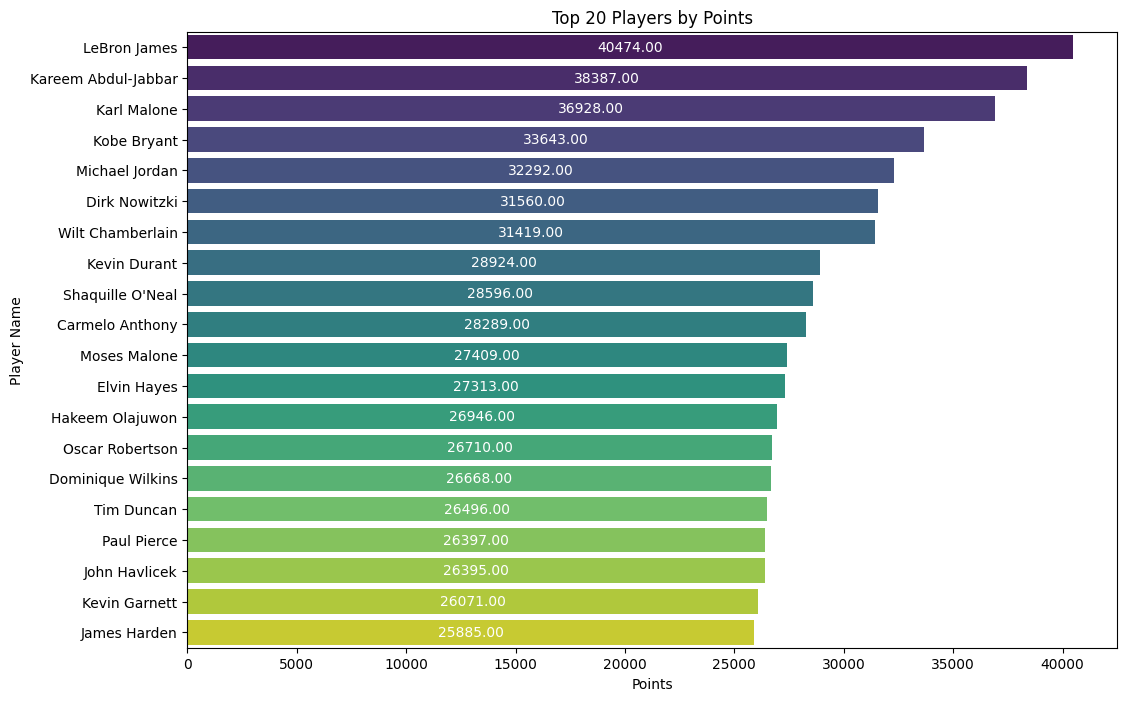

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='PTS', y='PLAYER_NAME', data=top_20_points, palette='viridis')
plt.title('Top 20 Players by Points')
plt.xlabel('Points')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')



#Top 20 NBA players by Total Assists

In [11]:
top_20_assists = df.nlargest(20, 'AST')[['PLAYER_NAME', 'AST']]

<ipython-input-12-8ae335b9580c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AST', y='PLAYER_NAME', data=top_20_assists, palette='viridis')


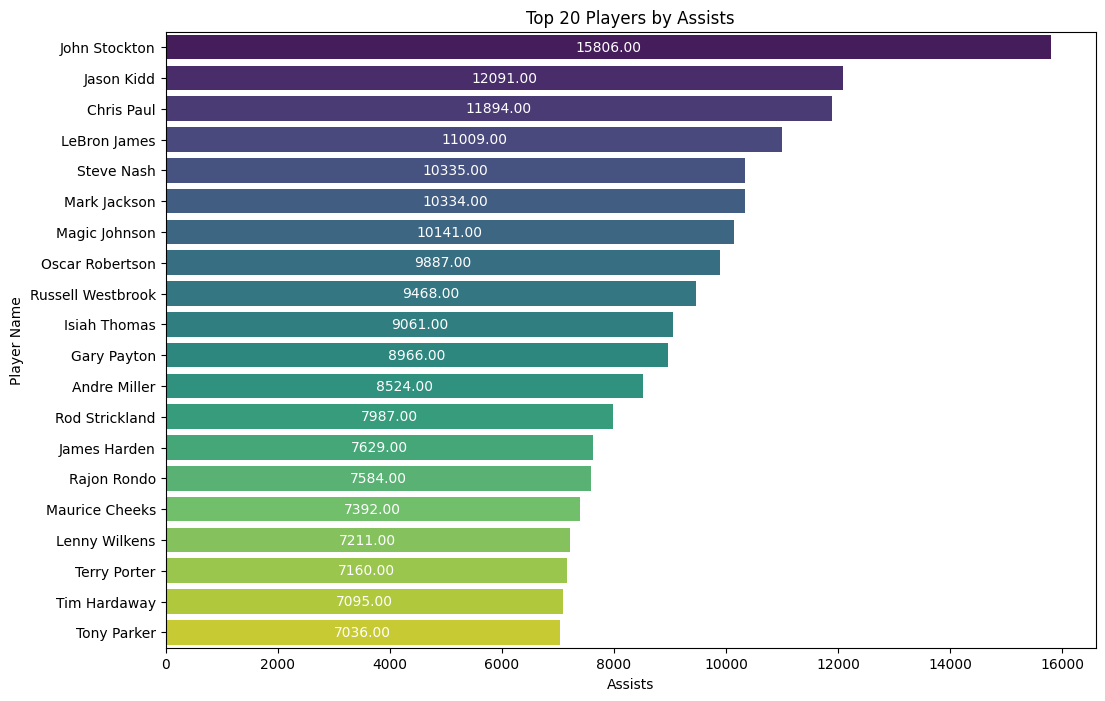

In [12]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='AST', y='PLAYER_NAME', data=top_20_assists, palette='viridis')
plt.title('Top 20 Players by Assists')
plt.xlabel('Assists')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total Rebounds

In [13]:
top_20_rebounds = df.nlargest(20, 'REB')[['PLAYER_NAME', 'REB']]

<ipython-input-14-448826958203>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='REB', y='PLAYER_NAME', data=top_20_rebounds, palette='viridis')


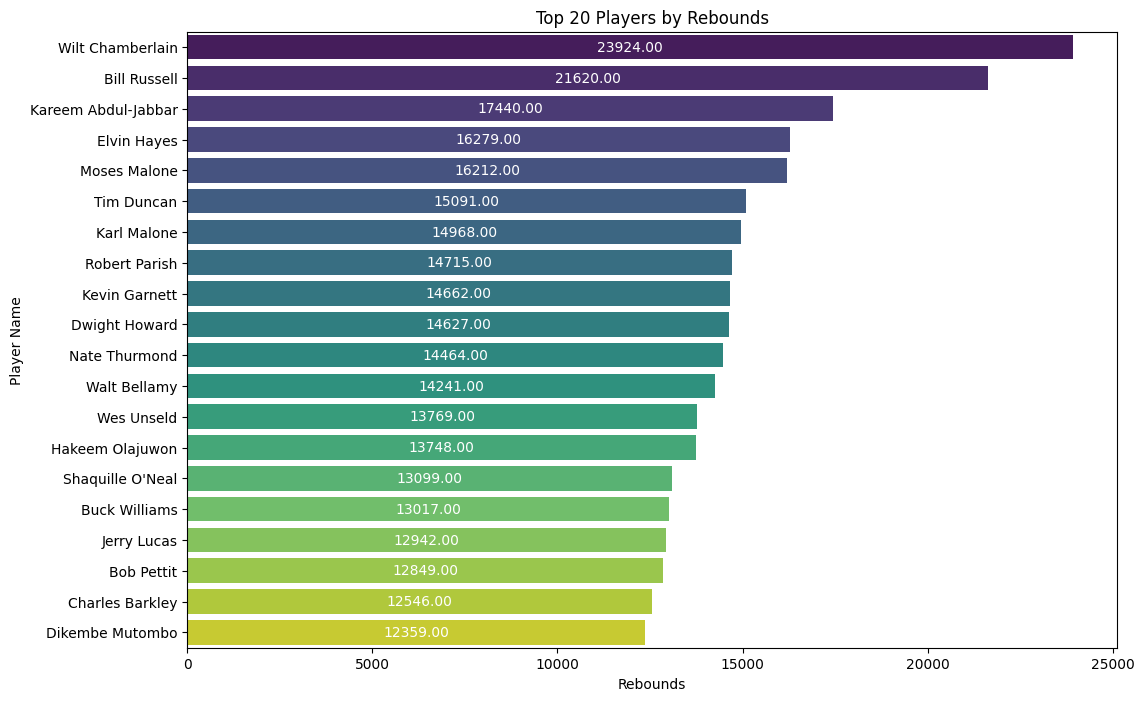

In [14]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='REB', y='PLAYER_NAME', data=top_20_rebounds, palette='viridis')
plt.title('Top 20 Players by Rebounds')
plt.xlabel('Rebounds')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total Steals

In [15]:
top_20_stl = df.nlargest(20, 'STL')[['PLAYER_NAME', 'STL']]

<ipython-input-16-94a3610f41d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='STL', y='PLAYER_NAME', data=top_20_stl, palette='viridis')


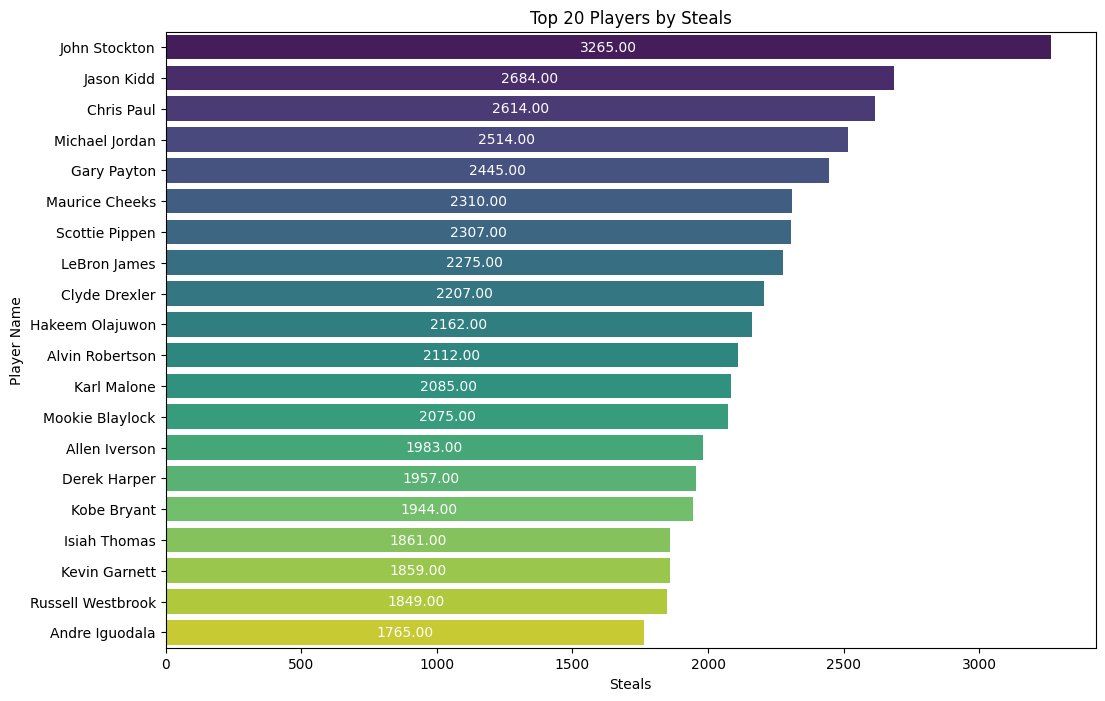

In [16]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='STL', y='PLAYER_NAME', data=top_20_stl, palette='viridis')
plt.title('Top 20 Players by Steals')
plt.xlabel('Steals')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total Blocks

In [17]:
top_20_blk = df.nlargest(20, 'BLK')[['PLAYER_NAME', 'BLK']]

<ipython-input-18-75a7b0ac8e0e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BLK', y='PLAYER_NAME', data=top_20_blk, palette='viridis')


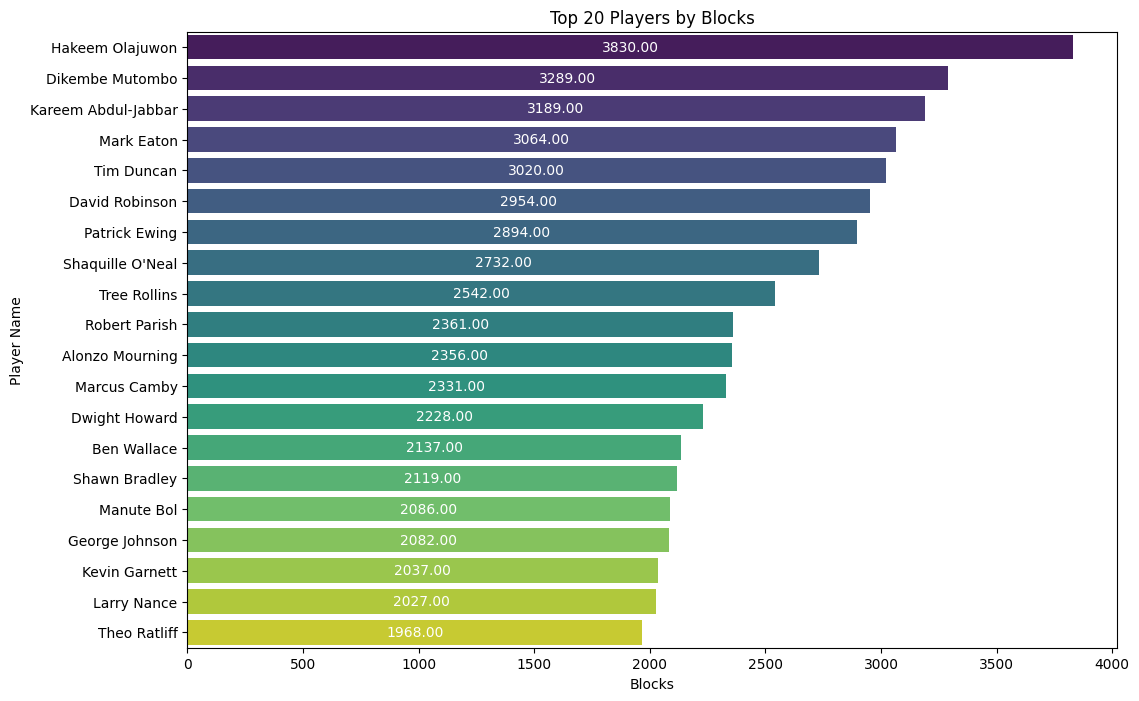

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='BLK', y='PLAYER_NAME', data=top_20_blk, palette='viridis')
plt.title('Top 20 Players by Blocks')
plt.xlabel('Blocks')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total Games Played

In [19]:
top_20_gp = df.nlargest(20, 'GP')[['PLAYER_NAME', 'GP']]

<ipython-input-20-2567d78a455c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='GP', y='PLAYER_NAME', data=top_20_gp, palette='viridis')


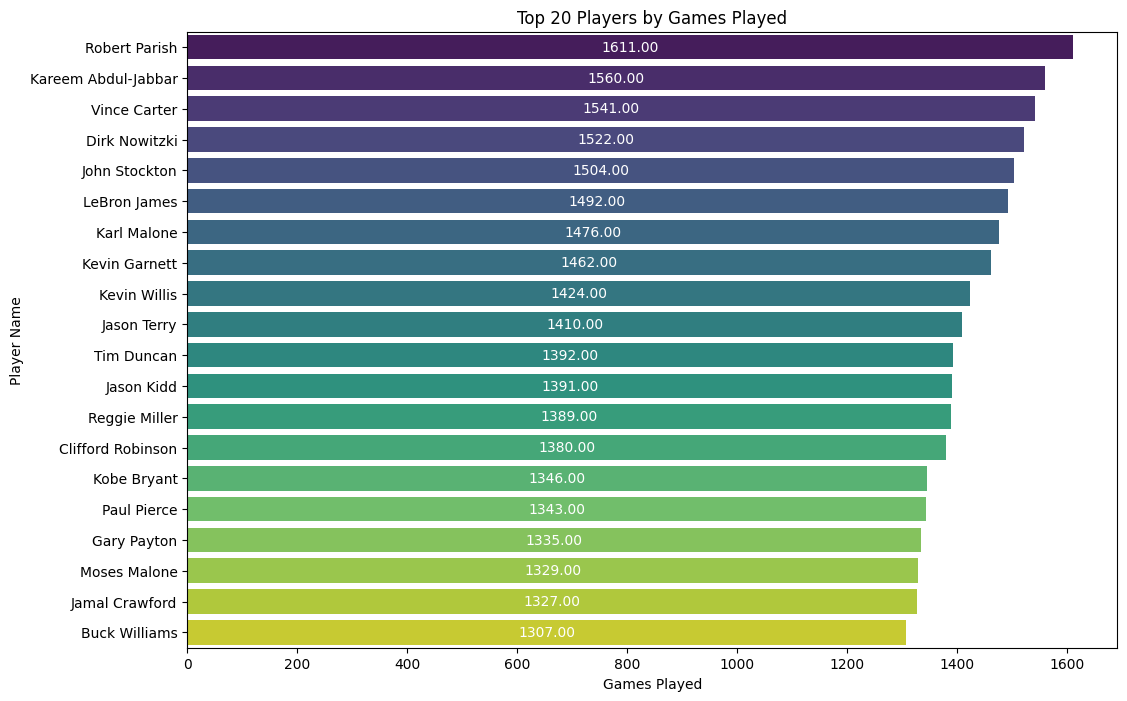

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='GP', y='PLAYER_NAME', data=top_20_gp, palette='viridis')
plt.title('Top 20 Players by Games Played')
plt.xlabel('Games Played')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total 3 pointers made

In [21]:
top_20_fg3m = df.nlargest(20, 'FG3M')[['PLAYER_NAME', 'FG3M']]

<ipython-input-22-30fad26def84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='FG3M', y='PLAYER_NAME', data=top_20_fg3m, palette='viridis')


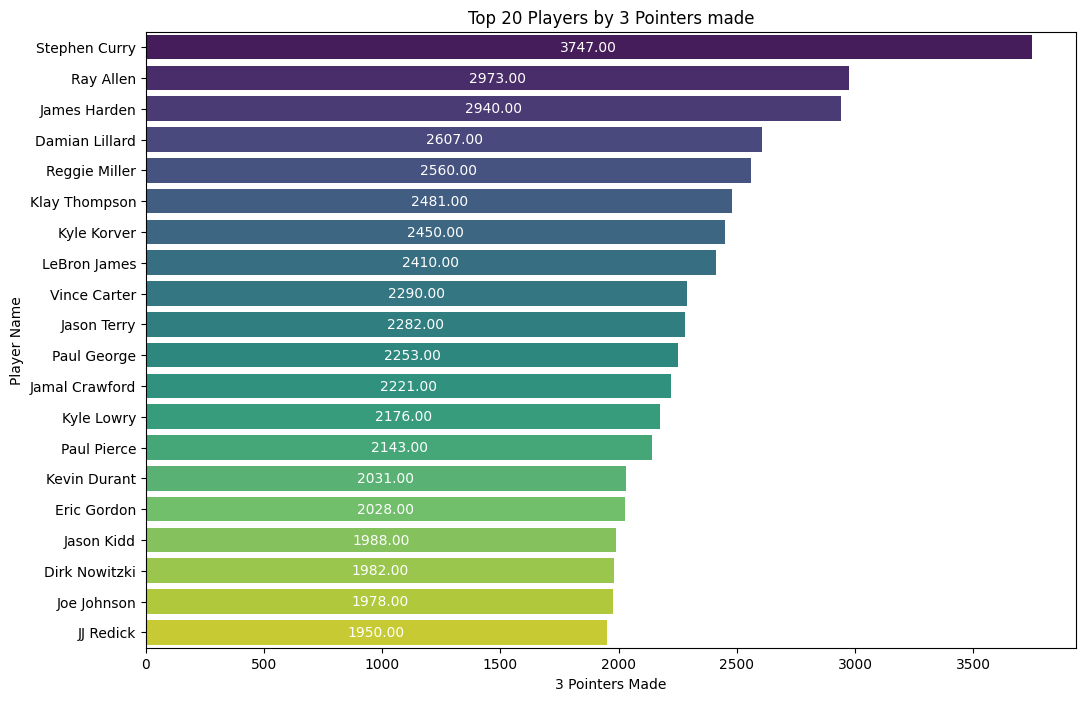

In [22]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='FG3M', y='PLAYER_NAME', data=top_20_fg3m, palette='viridis')
plt.title('Top 20 Players by 3 Pointers made')
plt.xlabel('3 Pointers Made')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

#Top 20 NBA players by Total Turnovers

In [24]:
top_20_tov = df.nlargest(20, 'TOV')[['PLAYER_NAME', 'TOV']]


<ipython-input-25-7f9f48ba9323>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TOV', y='PLAYER_NAME', data=top_20_tov, palette='viridis')


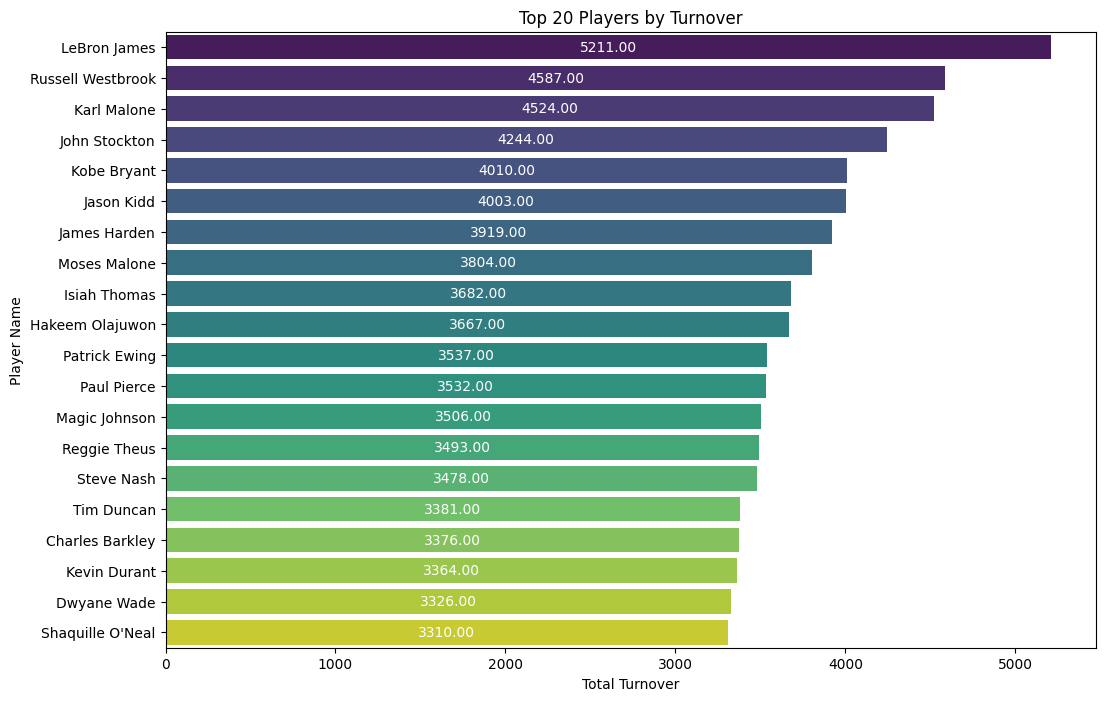

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='TOV', y='PLAYER_NAME', data=top_20_tov, palette='viridis')
plt.title('Top 20 Players by Turnover')
plt.xlabel('Total Turnover')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

##**Playoffs Statistical leaders**

In [44]:
test_url2 = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Playoffs&StatCategory=PTS'

In [45]:
r2 = requests.get(url= test_url2).json()

In [46]:
r2['resultSet']['headers']

['PLAYER_ID',
 'PLAYER_NAME',
 'GP',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'AST_TOV',
 'STL_TOV',
 'EFG_PCT',
 'TS_PCT',
 'GP_RANK',
 'MIN_RANK',
 'FGM_RANK',
 'FGA_RANK',
 'FG_PCT_RANK',
 'FG3M_RANK',
 'FG3A_RANK',
 'FG3_PCT_RANK',
 'FTM_RANK',
 'FTA_RANK',
 'FT_PCT_RANK',
 'OREB_RANK',
 'DREB_RANK',
 'REB_RANK',
 'AST_RANK',
 'STL_RANK',
 'BLK_RANK',
 'TOV_RANK',
 'PF_RANK',
 'PTS_RANK',
 'AST_TOV_RANK',
 'STL_TOV_RANK',
 'EFG_PCT1',
 'TS_PCT1']

In [47]:
table_headers = r2['resultSet']['headers']

In [48]:
df2 = pd.DataFrame(r2['resultSet']['rowSet'], columns = table_headers)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_ID     2897 non-null   int64  
 1   PLAYER_NAME   2895 non-null   object 
 2   GP            2897 non-null   int64  
 3   MIN           2727 non-null   float64
 4   FGM           2897 non-null   int64  
 5   FGA           2881 non-null   float64
 6   FG_PCT        2881 non-null   float64
 7   FG3M          2137 non-null   float64
 8   FG3A          2137 non-null   float64
 9   FG3_PCT       2137 non-null   float64
 10  FTM           2897 non-null   int64  
 11  FTA           2897 non-null   int64  
 12  FT_PCT        2897 non-null   float64
 13  OREB          2347 non-null   float64
 14  DREB          2347 non-null   float64
 15  REB           2754 non-null   float64
 16  AST           2896 non-null   float64
 17  STL           2347 non-null   float64
 18  BLK           2347 non-null 

##Top 20 NBA players in Playoffs by Points

In [51]:
top_20_PTS = df2.nlargest(20, 'PTS')[['PLAYER_NAME', 'PTS']]

<ipython-input-54-957e616002de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='PTS', y='PLAYER_NAME', data=top_20_PTS, palette='viridis')


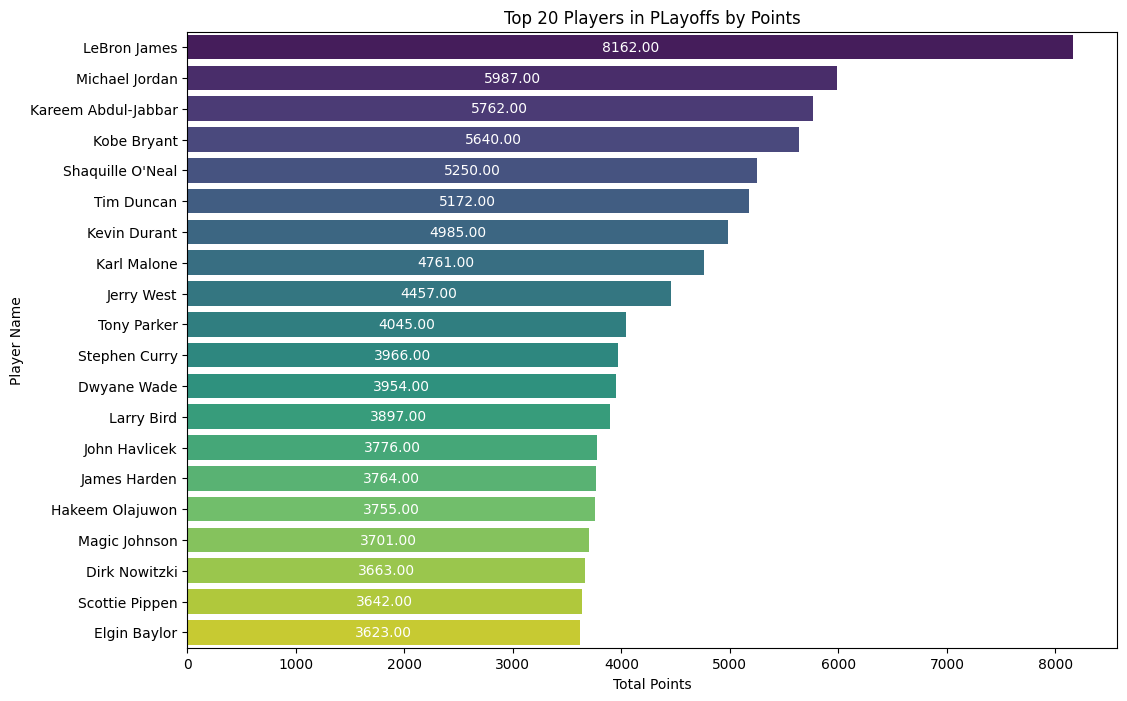

In [54]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='PTS', y='PLAYER_NAME', data=top_20_PTS, palette='viridis')
plt.title('Top 20 Players in PLayoffs by Points')
plt.xlabel('Total Points')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Assists

In [53]:
top_20_AST = df2.nlargest(20, 'AST')[['PLAYER_NAME', 'AST']]

<ipython-input-55-e5330dbd3116>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AST', y='PLAYER_NAME', data=top_20_AST, palette='viridis')


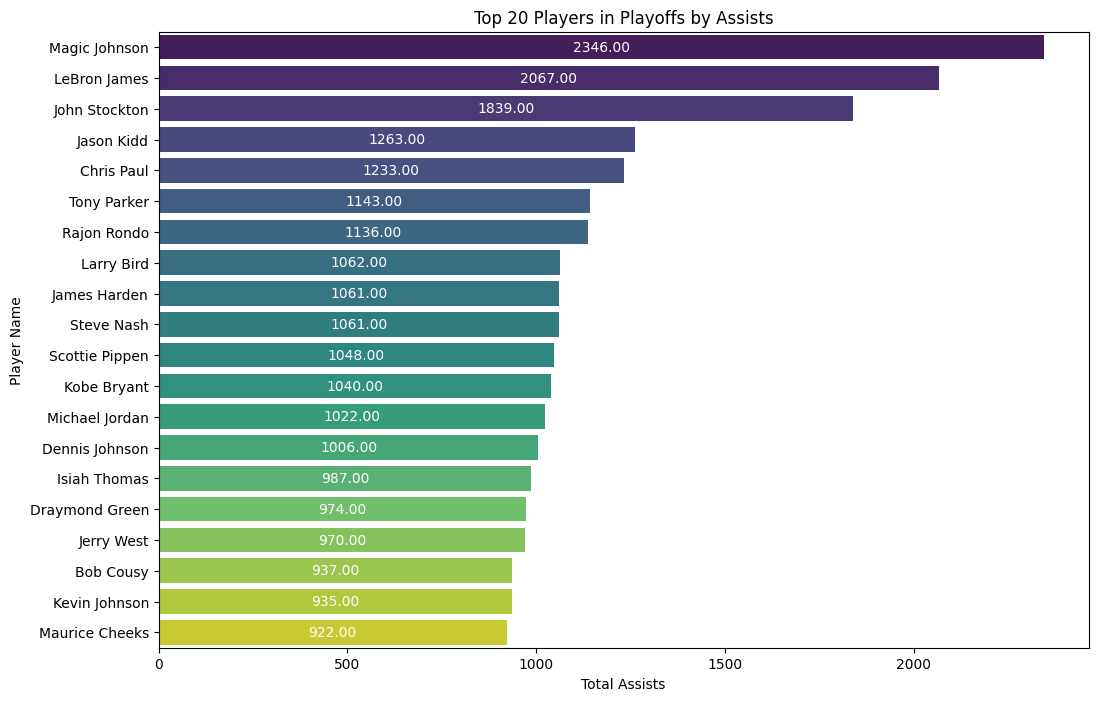

In [55]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='AST', y='PLAYER_NAME', data=top_20_AST, palette='viridis')
plt.title('Top 20 Players in Playoffs by Assists')
plt.xlabel('Total Assists')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Rebounds

In [56]:
top_20_REB = df2.nlargest(20, 'REB')[['PLAYER_NAME', 'REB']]

<ipython-input-58-dd07b8d29ea4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='REB', y='PLAYER_NAME', data=top_20_REB, palette='viridis')


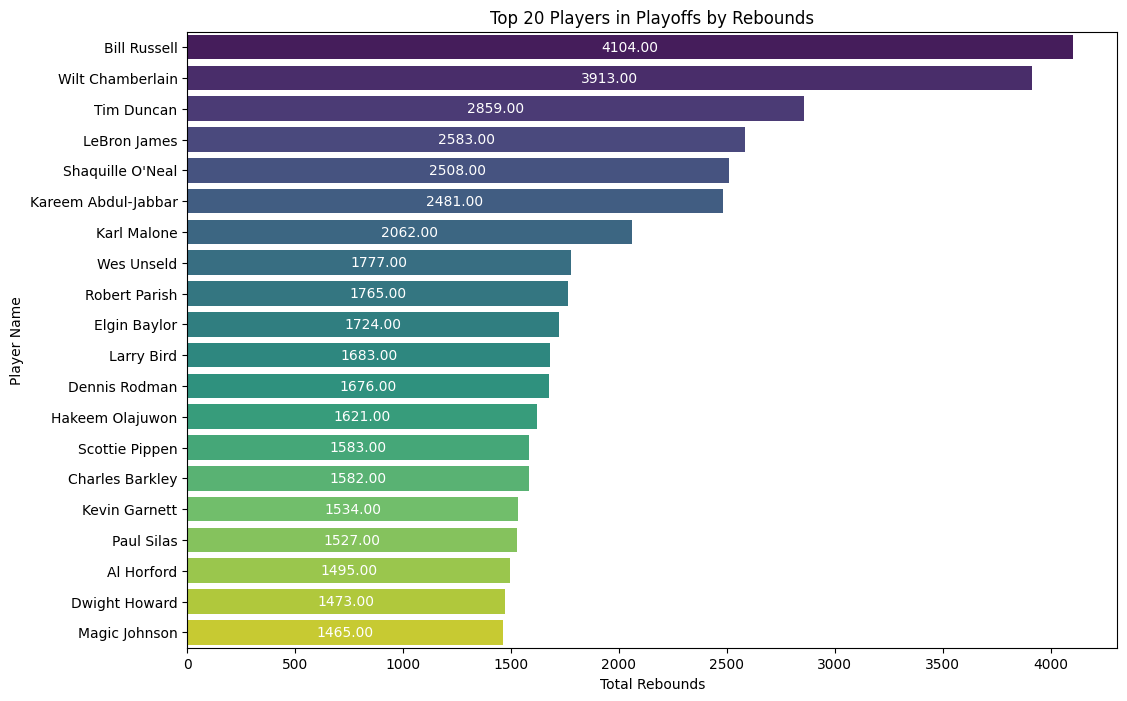

In [58]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='REB', y='PLAYER_NAME', data=top_20_REB, palette='viridis')
plt.title('Top 20 Players in Playoffs by Rebounds')
plt.xlabel('Total Rebounds')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

##Top 20 NBA players in Playoffs by 3 pointers made

In [59]:
top_20_3PM = df2.nlargest(20, 'FG3M')[['PLAYER_NAME', 'FG3M']]

<ipython-input-60-abb455c2c51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='FG3M', y='PLAYER_NAME', data=top_20_3PM, palette='viridis')


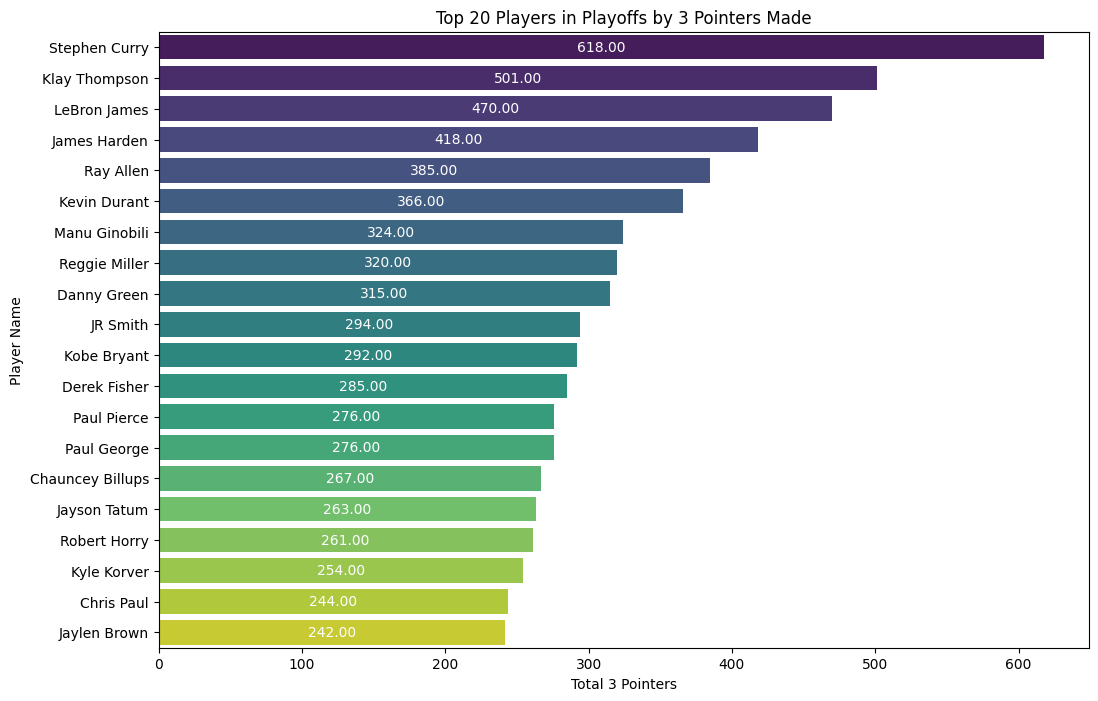

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='FG3M', y='PLAYER_NAME', data=top_20_3PM, palette='viridis')
plt.title('Top 20 Players in Playoffs by 3 Pointers Made')
plt.xlabel('Total 3 Pointers')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Games Played

In [61]:
top_20_GamesPlayed = df2.nlargest(20, 'GP')[['PLAYER_NAME', 'GP']]

<ipython-input-62-38ab7065e9c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='GP', y='PLAYER_NAME', data=top_20_GamesPlayed, palette='viridis')


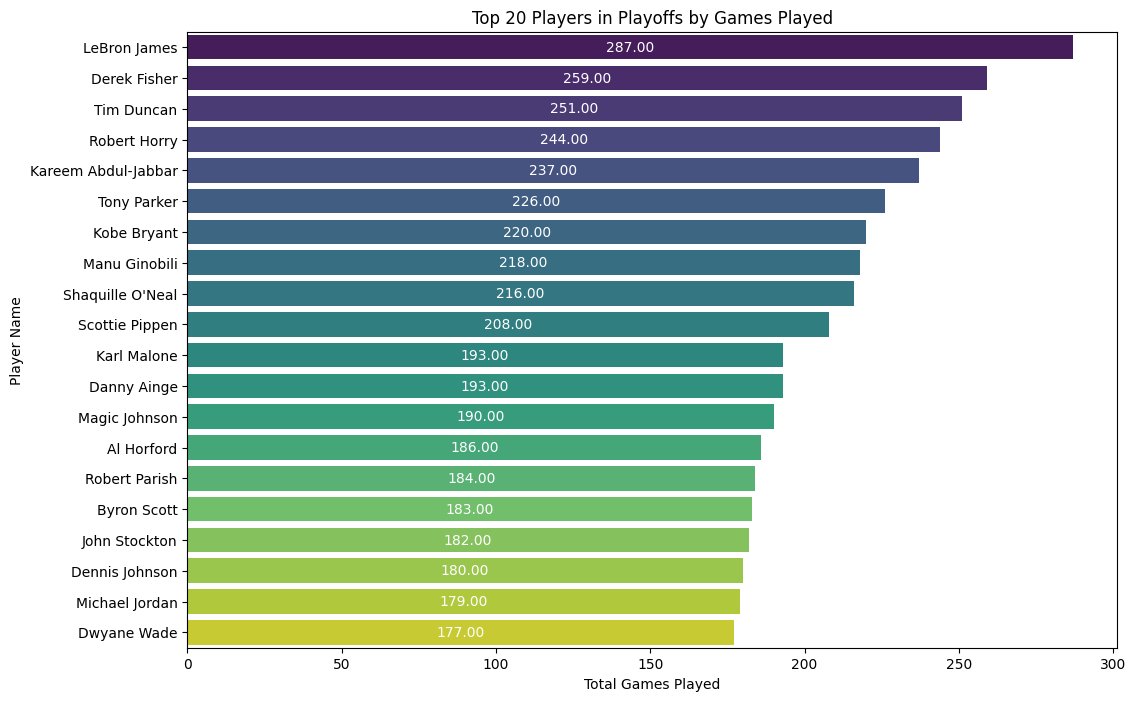

In [62]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='GP', y='PLAYER_NAME', data=top_20_GamesPlayed, palette='viridis')
plt.title('Top 20 Players in Playoffs by Games Played')
plt.xlabel('Total Games Played')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Steals

In [63]:
top_20_STL = df2.nlargest(20, 'STL')[['PLAYER_NAME', 'STL']]

<ipython-input-64-fa2ca8482d9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='STL', y='PLAYER_NAME', data=top_20_STL, palette='viridis')


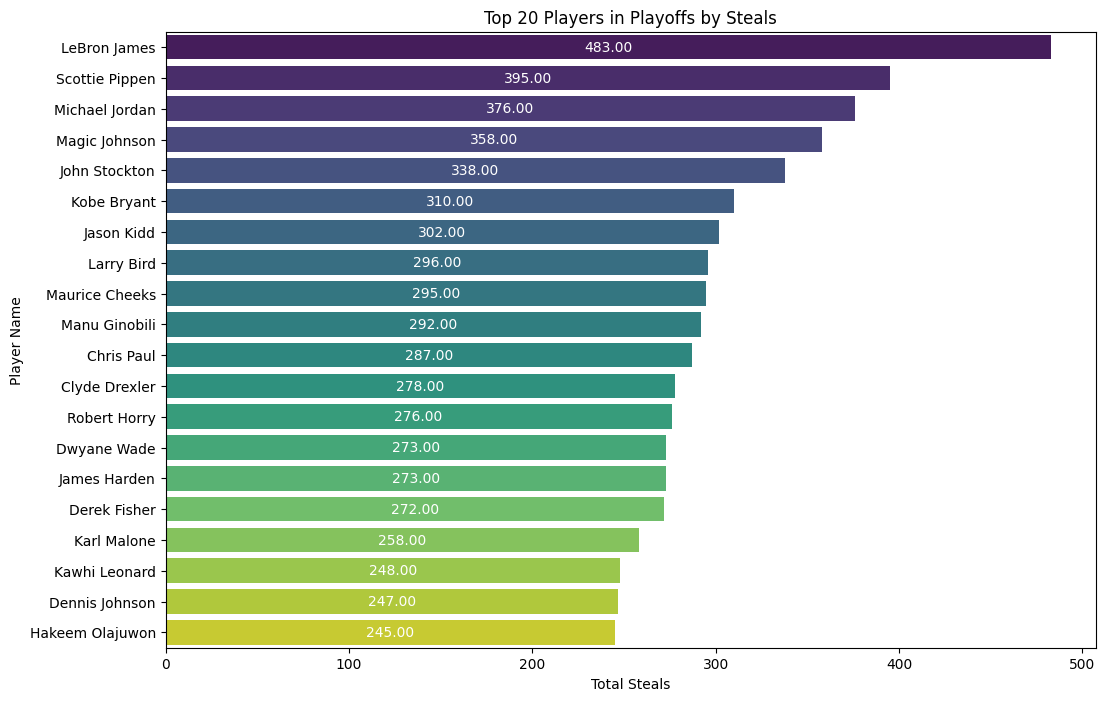

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='STL', y='PLAYER_NAME', data=top_20_STL, palette='viridis')
plt.title('Top 20 Players in Playoffs by Steals')
plt.xlabel('Total Steals')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Blocks

In [65]:
top_20_BLK = df2.nlargest(20, 'BLK')[['PLAYER_NAME', 'BLK']]

<ipython-input-66-544e0c3276eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BLK', y='PLAYER_NAME', data=top_20_BLK, palette='viridis')


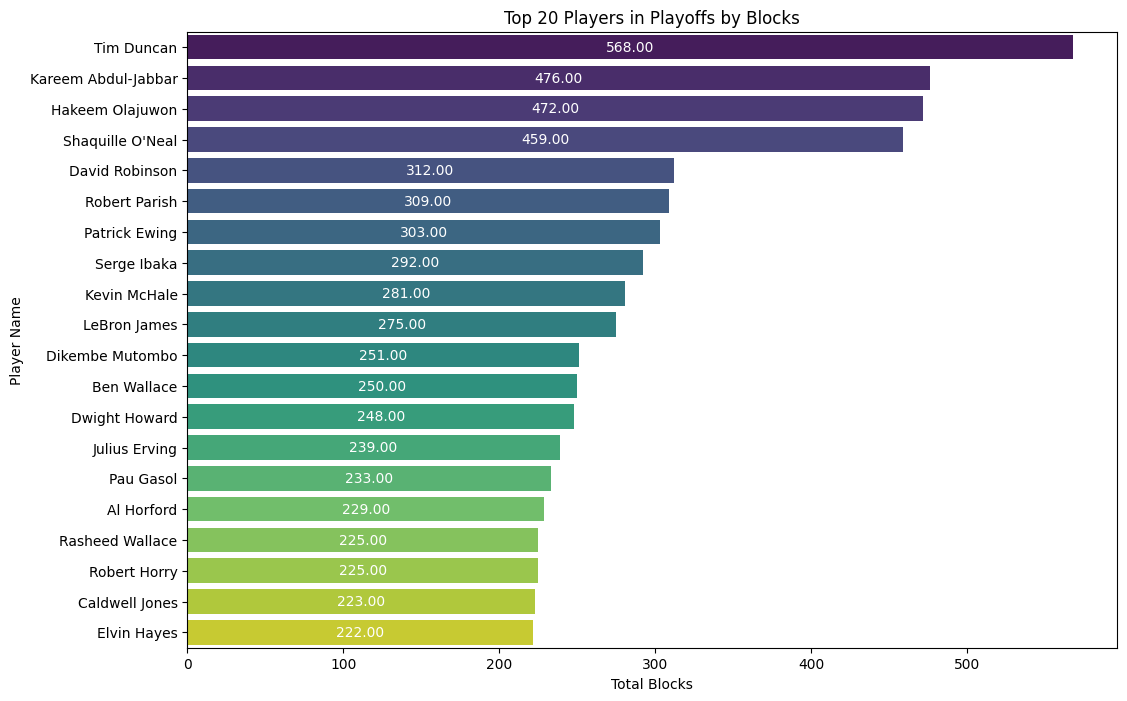

In [66]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='BLK', y='PLAYER_NAME', data=top_20_BLK, palette='viridis')
plt.title('Top 20 Players in Playoffs by Blocks')
plt.xlabel('Total Blocks')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')

## Top 20 NBA players in Playoffs by Turnovers

In [67]:
top_20_TOV = df2.nlargest(20, 'TOV')[['PLAYER_NAME', 'TOV']]

<ipython-input-68-e7f78d2fc7d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TOV', y='PLAYER_NAME', data=top_20_TOV, palette='viridis')


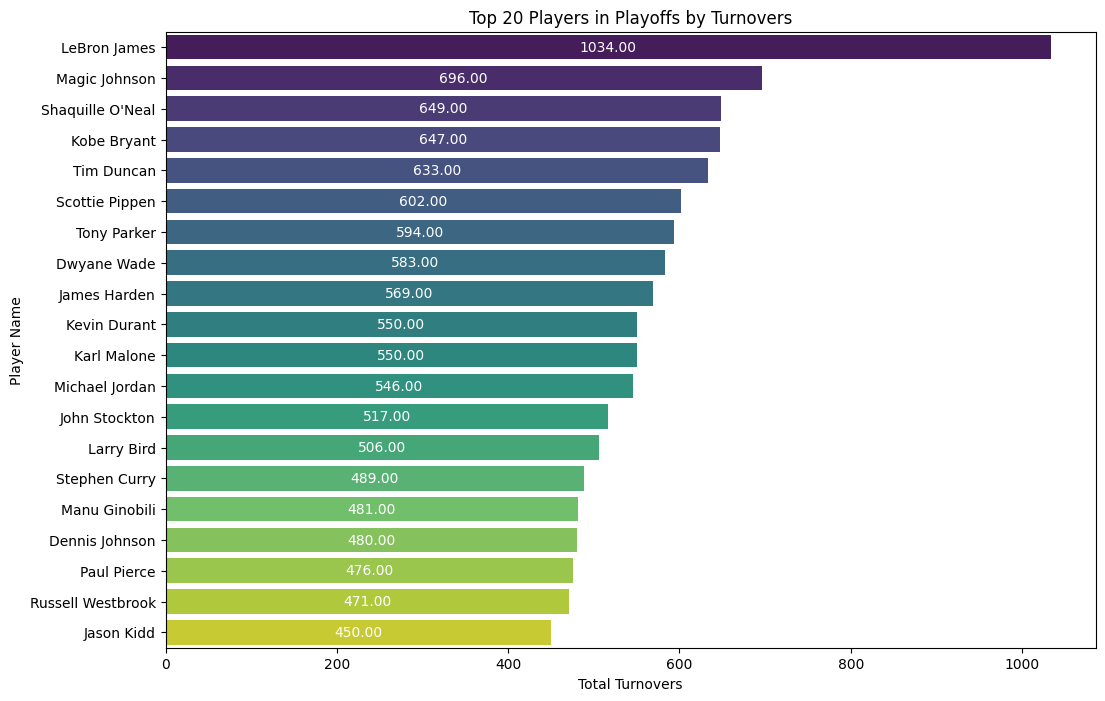

In [68]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='TOV', y='PLAYER_NAME', data=top_20_TOV, palette='viridis')
plt.title('Top 20 Players in Playoffs by Turnovers')
plt.xlabel('Total Turnovers')
plt.ylabel('Player Name')

for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        plt.text(x, y, f'{width:.2f}', ha='center', va='center', color='white')